# Исследование объявлений о продаже квартир
### Цель работы: установить параметры для определения рыночной стоимости объектов недвижимости

## <a name="contents">Задачи исследования:</a>
## [1. Предобработка данных](#stage_1)
* Определим и изучим пропущенные значения. 
* Определим причины, которые могли привести к пропускам в данных.
* Заполним пропущенные значения
* Приведем данные к корректным типам

## [2. Расчет параметров:](#stage_2)
* цена квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

## [3. Исследовательский анализ данных:](#stage_3)
* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

## [4. Формирование общего вывода](#stage_4)

<a name="stage_1"></a>
## Шаг 1. Предобработка данных

[Вернуться к оглавлению](#contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport

C:\Users\Max_Berdnikov\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Max_Berdnikov\AppData\Roaming\Python\Python311\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
data = pd.read_csv(r'C:\Users\Max_Berdnikov\Desktop\data\real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16492,8,4873503.0,65.94,2017-12-26T00:00:00,2,NaN,25.0,52.94,1,False,False,False,13.0,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,406.0
13703,13,7800000.0,82.40,2017-04-07T00:00:00,3,2.59,10.0,49.40,1,NaN,False,False,11.9,5.0,Санкт-Петербург,15963.0,16970.0,0.0,NaN,0.0,NaN,539.0
1817,0,7190000.0,54.90,2018-10-29T00:00:00,2,2.60,14.0,31.10,4,NaN,False,False,8.2,1.0,Санкт-Петербург,17235.0,12490.0,0.0,NaN,0.0,NaN,11.0
8512,8,7950000.0,55.00,2019-03-29T00:00:00,2,2.80,19.0,NaN,5,False,False,False,NaN,2.0,Санкт-Петербург,18490.0,17492.0,0.0,NaN,2.0,113.0,10.0
21950,16,7500000.0,52.00,2018-06-20T00:00:00,2,NaN,5.0,NaN,2,NaN,False,False,NaN,NaN,Санкт-Петербург,14502.0,13298.0,2.0,191.0,2.0,431.0,NaN
11295,12,5250000.0,42.97,2017-08-03T00:00:00,1,NaN,19.0,20.00,7,NaN,False,False,12.0,2.0,Санкт-Петербург,18881.0,17734.0,0.0,NaN,2.0,210.0,172.0
1338,1,2400000.0,69.00,2018-03-16T00:00:00,3,NaN,9.0,NaN,3,NaN,False,False,NaN,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,31.0
10820,6,2100000.0,32.40,2016-06-08T00:00:00,1,2.50,5.0,18.30,2,NaN,False,False,5.4,0.0,деревня Старая,NaN,NaN,NaN,NaN,NaN,NaN,371.0
14525,12,9000000.0,110.80,2017-09-11T00:00:00,4,2.70,12.0,68.00,12,NaN,False,False,12.6,2.0,Санкт-Петербург,34492.0,13956.0,0.0,NaN,0.0,NaN,380.0
23050,9,2650000.0,43.00,2016-03-15T00:00:00,2,NaN,5.0,30.40,5,NaN,False,False,5.5,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,184.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Шаг 2. Предобработка данных

### Шаг 2.1 Изменение типов данных

In [7]:
data['last_price'] = data['last_price'].astype('int')

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [10]:
data[data['is_apartment'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [11]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [12]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [14]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Шаг 2.2 Работа с пропусками и дубликатами

In [15]:
data.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [16]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [17]:
data.duplicated().sum()

0

In [18]:
# Явно отразим отсутствие балконов, парков и водоемов в районе недвижимости
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['parks_around3000'].fillna(0)
data['balcony'] = data['balcony'].fillna(0)

In [19]:
data[data['locality_name'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000,81.70,2016-04-15,3,3.55,5.0,50.80,2,NaN,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000,80.00,2017-05-30,3,NaN,4.0,42.60,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,34.0
2603,20,3351765,42.70,2015-09-20,1,NaN,24.0,15.60,3,NaN,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,0.0,374.0,276.0
2632,2,5130593,62.40,2015-10-11,2,NaN,24.0,33.10,21,NaN,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,0.0,374.0,256.0
3574,10,4200000,46.50,2016-05-28,2,NaN,5.0,30.80,5,NaN,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,0.0,603.0,45.0
4151,17,17600000,89.50,2014-12-09,2,3.00,8.0,39.62,7,NaN,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,1.0,722.0,869.0
4189,7,9200000,80.00,2015-12-10,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000,83.00,2015-08-14,3,NaN,7.0,NaN,6,NaN,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000,85.50,2016-01-20,3,NaN,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,1.0,NaN,303.0
5707,7,3700000,30.00,2016-04-29,1,NaN,24.0,20.00,23,NaN,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,0.0,170.0,49.0


In [20]:
data.dropna(subset=['locality_name'], inplace=True)

In [21]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,1.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,1.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,2.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,2.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,1.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,2.0,196.0,602.0


In [22]:
data[(data['is_apartment']==True) & (data['living_area'].isnull())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1608,12,2150000,20.1,2019-01-30,1,NaN,9.0,NaN,1,True,False,False,NaN,0.0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000,152.0,2018-07-27,3,3.0,3.0,NaN,1,True,False,False,NaN,1.0,Всеволожск,NaN,NaN,0.0,NaN,0.0,NaN,7.0
5297,19,45000000,96.0,2018-11-15,2,3.2,6.0,NaN,4,True,False,False,45.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,2.0,569.0,NaN
6353,0,11620701,122.3,2018-10-01,2,2.8,3.0,NaN,3,True,False,False,NaN,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,792.0,NaN
6871,14,6100000,58.0,2018-07-25,2,3.1,4.0,NaN,3,True,False,False,NaN,0.0,Санкт-Петербург,45942.0,20802.0,0.0,NaN,0.0,792.0,126.0
14459,4,9635328,76.8,2018-10-01,1,2.8,3.0,NaN,3,True,False,False,NaN,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,792.0,30.0
14603,12,13490000,100.6,2018-07-31,7,NaN,4.0,NaN,2,True,False,False,NaN,0.0,Санкт-Петербург,24309.0,3876.0,3.0,574.0,3.0,325.0,50.0
22560,15,5500000,98.0,2018-12-09,3,2.6,8.0,NaN,2,True,False,False,28.0,0.0,Красное Село,27164.0,30589.0,0.0,NaN,0.0,NaN,7.0


In [23]:
data['living_area'].isnull().sum()

1898

In [24]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<Axes: ylabel='Frequency'>

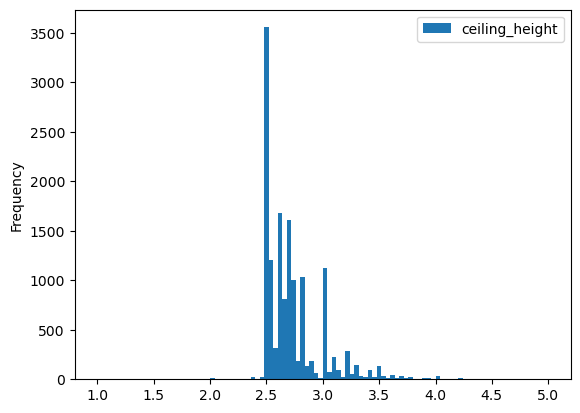

In [25]:
data[~(data['ceiling_height'].isnull())].plot(y='ceiling_height', bins = 100, kind='hist', range=(1, 5))

In [26]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [27]:
len(data['locality_name'].unique())

364

In [28]:
data['locality_name'] = data['locality_name'].str.lower()

In [29]:
len(data['locality_name'].unique())

364

In [30]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [31]:
len(data['locality_name'].unique())

330

In [32]:
# Уберем метры из столбцов с прудами, аэропортами и центрами городам, приведем все к километрам
data[['airports_nearest', 
     'cityCenters_nearest', 
     'parks_nearest', 
     'ponds_nearest']] = data[['airports_nearest', 
                             'cityCenters_nearest', 
                             'parks_nearest', 
                             'ponds_nearest']].apply(lambda x: round(x / 1000, 1))

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18.9,16.0,1.0,0.5,1.0,0.8,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12.8,18.6,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21.7,13.9,1.0,0.1,1.0,0.6,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28.1,6.8,2.0,0.1,2.0,0.2,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31.9,8.1,2.0,0.1,2.0,0.0,121.0


### Выводы

Столбцы `parks_around3000`и `ponds_around3000` с пропущенными значениями заполняем нулями, т.к. расстояние до водоемов и парков в соответствующих столбцах также отсутствует, значит отсутствуют и сами объекты притяжения.

Удалим строки с пропущенными значениями в столбце `locality_name`. Этих данных менее 0,2% и они не отражают местоположение квартиры, что недопустимо в данном исследовании.

В столбце `living_area` 1898 значений. Возможно часть этих предложений являются апартаментами, и не относятся к жилому фонду (не имеют жилой площади), но имеют необходимые условия для проживания. Однако в столбце `is_apartment` много пропущенных значений, которые нельзя восстановить.

В `days_exposition` хранящей информацию о количестве днях размещения объявления от публикации до снятия отсутствует 13.4% данных. Возможно эти объявления до сих пор не закрыты.

Довольно большое количество пропусков в столбце `ceiling_height` и `balcony`. Если пустые значения для балконов обозначают их отсутствие и просто заменяются на нулевые значения, то высота потолков была не обозначена при публикации. Также мы видим, что в данных о высоте потолка присутствуют выбросы в обе стороны (высота 1 и 100 метров).

В названиях НП путем замены буквы "ё" на "е" и приведения букв к нижнему регистру удалось сократить наименования с 364 до 330 штук. Дальнейший поиск и замена наименований нецелесообразен ввиду нехватки данных (возможно отличие поселка, деревни и города с одинаковым названием).

Расстояния до точек притяжения приведены к километрам с округлением до 1 знака после запятой.

<a name="stage_2"></a>
## Шаг 2. Расчет параметров

[Вернуться к оглавлению](#contents)

### Шаг 2.1 Цена квадратного метра
Для расчета будем использовать столбец с последней ценой `last_price` и общую площадь недвижимости `total_area`. Пропусков у нас в этих столбцах нет.

In [34]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18.9,16.0,1.0,0.5,1.0,0.8,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12.8,18.6,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21.7,13.9,1.0,0.1,1.0,0.6,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28.1,6.8,2.0,0.1,2.0,0.2,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31.9,8.1,2.0,0.1,2.0,0.0,121.0


In [35]:
data['price_m2'] = (data['last_price'] / data['total_area']).astype('int')

In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18.9,16.0,1.0,0.5,1.0,0.8,NaN,120370
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12.8,18.6,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21.7,13.9,1.0,0.1,1.0,0.6,558.0,92785
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28.1,6.8,2.0,0.1,2.0,0.2,424.0,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31.9,8.1,2.0,0.1,2.0,0.0,121.0,100000


### Шаг 2.2 День недели, месяц и год публикации объявления

In [37]:
def extract_date_info(x):
    return pd.Series([x.day_name(), x.month, x.year])

In [38]:
data[['day', 'month', 'year']] = data['first_day_exposition'].apply(extract_date_info)

In [39]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18.9,16.0,1.0,0.5,1.0,0.8,NaN,120370,Thursday,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12.8,18.6,0.0,NaN,0.0,NaN,81.0,82920,Tuesday,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21.7,13.9,1.0,0.1,1.0,0.6,558.0,92785,Thursday,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28.1,6.8,2.0,0.1,2.0,0.2,424.0,408176,Friday,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31.9,8.1,2.0,0.1,2.0,0.0,121.0,100000,Tuesday,6,2018


### Шаг 2.3 Категория этажа квартиры

In [40]:
def floor_category(df):
    if df['floor'] == 1:
        return 'первый'
    if df['floor'] == df['floors_total']:
        return 'последний'
    return 'другой'

In [41]:
# Есть некоторое число пропущенных значений в общем количестве этажей. Влияние незначительно.
data['floors_total'].isnull().value_counts()

False    23565
True        85
Name: floors_total, dtype: int64

In [42]:
data['floor_category'] = data.apply(floor_category, axis=1)

In [43]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18.9,16.0,1.0,0.5,1.0,0.8,NaN,120370,Thursday,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12.8,18.6,0.0,NaN,0.0,NaN,81.0,82920,Tuesday,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21.7,13.9,1.0,0.1,1.0,0.6,558.0,92785,Thursday,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28.1,6.8,2.0,0.1,2.0,0.2,424.0,408176,Friday,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31.9,8.1,2.0,0.1,2.0,0.0,121.0,100000,Tuesday,6,2018,другой


### Шаг 2.4 Отношение жилой площади и площади кухни к общей

In [44]:
# Рассчитаем данное отношение с точностью до 2-ух знаков после запятой
def area_ratio(df):
    return pd.Series([round(df['living_area'] / df['total_area'], 2), round(df['kitchen_area'] / df['total_area'], 2)])

In [45]:
# Есть отсутствующие значения. В дальнейших расчетах будем работать срезами без NaN значений
print('Пропущенные значения для площади кухни:', len(data[data['kitchen_area'].isnull()]))
print('Пропущенные значения жилой площади:', len(data[data['living_area'].isnull()]))
print('Пропущенные значения общей площади:', len(data[data['total_area'].isnull()]))

Пропущенные значения для площади кухни: 2269
Пропущенные значения жилой площади: 1898
Пропущенные значения общей площади: 0


In [46]:
data[['living_area_ratio', 'kitchen_area_ratio']] = data.apply(area_ratio, axis=1)

In [47]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,санкт-петербург,18.9,16.0,1.0,0.5,1.0,0.8,NaN,120370,Thursday,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок шушары,12.8,18.6,0.0,NaN,0.0,NaN,81.0,82920,Tuesday,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21.7,13.9,1.0,0.1,1.0,0.6,558.0,92785,Thursday,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28.1,6.8,2.0,0.1,2.0,0.2,424.0,408176,Friday,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,санкт-петербург,31.9,8.1,2.0,0.1,2.0,0.0,121.0,100000,Tuesday,6,2018,другой,0.32,0.41


<a name='stage_3'></a>  
## Шаг 3. Исследовательский анализ данных

[Вернуться к оглавлению](#contents)

### Шаг 3.1 Изучение параметров: площадь, цена, число комнат, высота потолков

**Во время предобработки замечены следующие странные значения:**
* Максимальная площадь в 900 м.кв.
* Высота потолка в 1.3 метра
* Стоимость квартиры 763 млн. руб.

In [48]:
# Напишем функцию для чистки столбцов, где содержатся выбивающиеся значения
def delete_outliers(df, column):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    return df.loc[(df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))]

### Шаг 3.1.1 Изучение площади

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

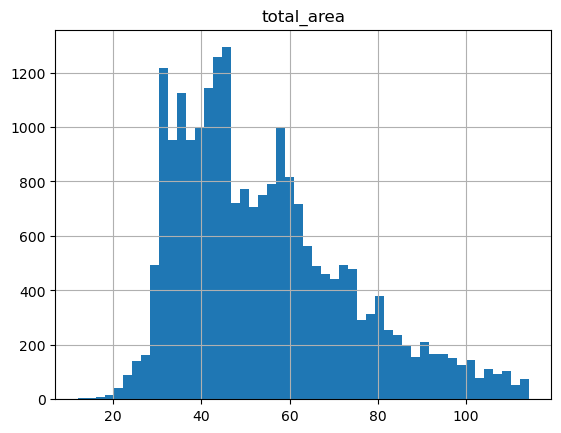

In [49]:
# Построим распределение по очищенным данным
delete_outliers(data, 'total_area').hist('total_area', bins=50)

In [50]:
# Очищенные данные
delete_outliers(data, 'total_area')['total_area'].describe()

count    22406.000000
mean        54.325685
std         19.349559
min         12.000000
25%         39.400000
50%         50.100000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64

In [51]:
# Неочищенные данные
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

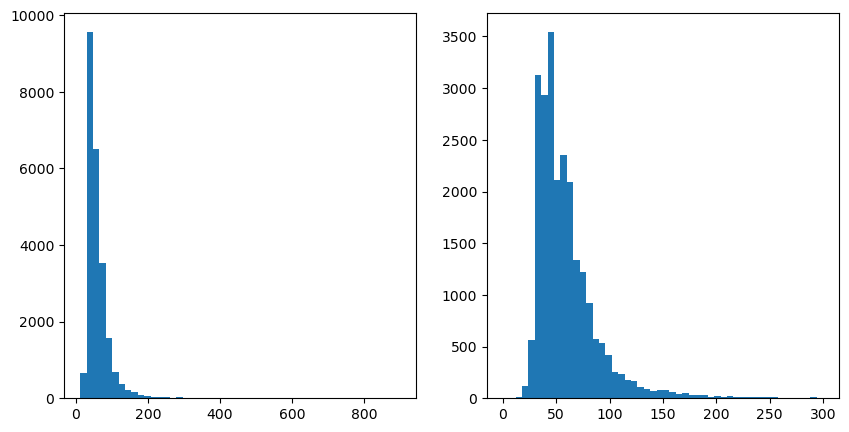

In [52]:
_, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(data['total_area'], bins=50)
axs[1].hist(data['total_area'], bins=50, range=(0, 300));

**Вывод**

В **среднем** продаются квартиры **площадью 54 кв.м.** На неочищенных данных видно длинный хвост справа, доходящий до 900 кв.м. В целом 92% квартир обладают площадью менее 100 кв.м. 

### Шаг 3.1.2 Изучение цены

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

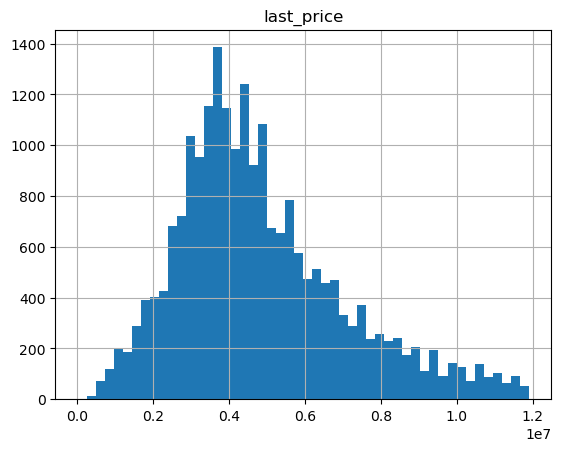

In [53]:
# Построим распределение по очищенным данным
delete_outliers(data, 'last_price').hist('last_price', bins=50)

In [54]:
# Очищенные данные
delete_outliers(data, 'last_price')['last_price'].describe()

count    2.159500e+04
mean     4.838942e+06
std      2.217282e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.189440e+07
Name: last_price, dtype: float64

In [55]:
# Неочищенные данные
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

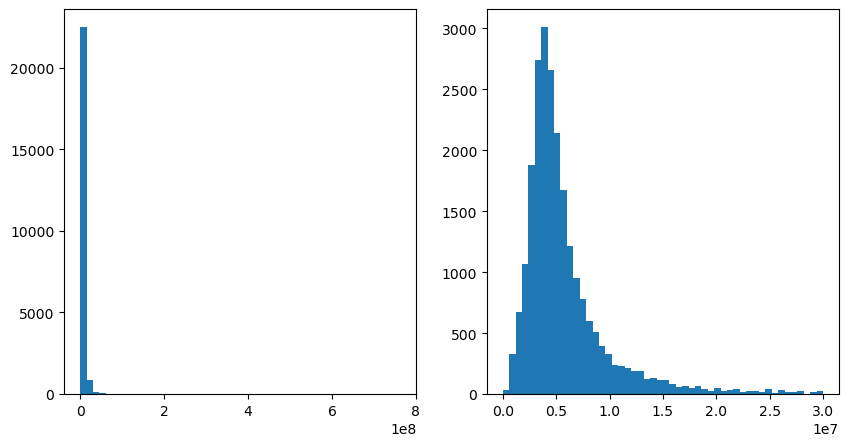

In [56]:
_, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(data['last_price'], bins=50)
axs[1].hist(data['last_price'], bins=50, range=(0, 30000000));

**Вывод**

В среднем стоимость продающихся квартир составляет 4.84 млн. руб. 95% квартир имеют стоимость до 15.3 млн. руб. 

### Шаг 3.1.3 Изучение количества комнат

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

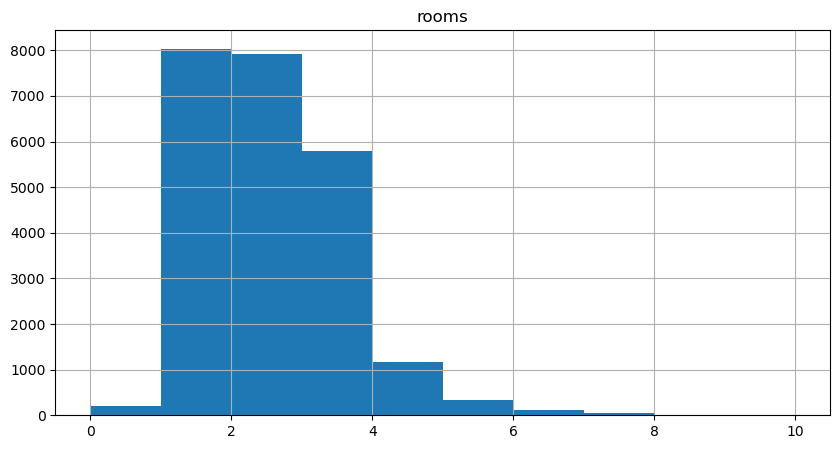

In [57]:
data.hist('rooms', bins=10, range=(0,10), figsize=(10, 5))

In [58]:
# по очищенным данным
delete_outliers(data, 'rooms')['rooms'].describe()

count    23560.000000
mean         2.047326
std          1.006837
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [59]:
# по неочищенным данным
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [60]:
data.groupby('rooms')['rooms'].count()

rooms
0      197
1     8036
2     7924
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

<Axes: ylabel='rooms'>

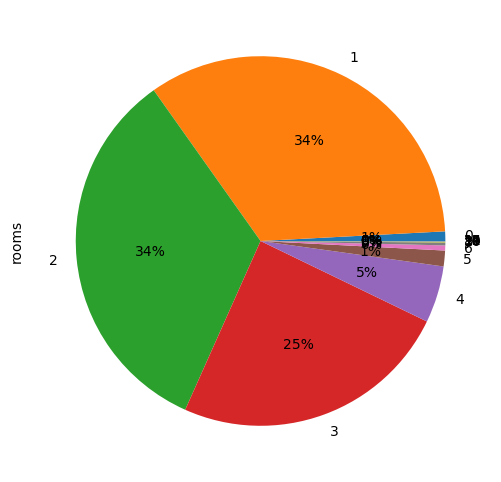

In [61]:
data.groupby('rooms')['rooms'].count().plot(kind='pie', figsize=(6, 6), autopct='%1.0f%%')

**Вывод**

68% рынка занимают равные части 1-комнатных и 2-комнатых квартир. Четверть рынка - это 3-комнатные квартиры. Только 5% рынка - это квартиры с 4-мя комнатами. Остальные 2% приходятся на варианты 5-19 комнат.

### Шаг 3.1.4 Изучение высоты потолков

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

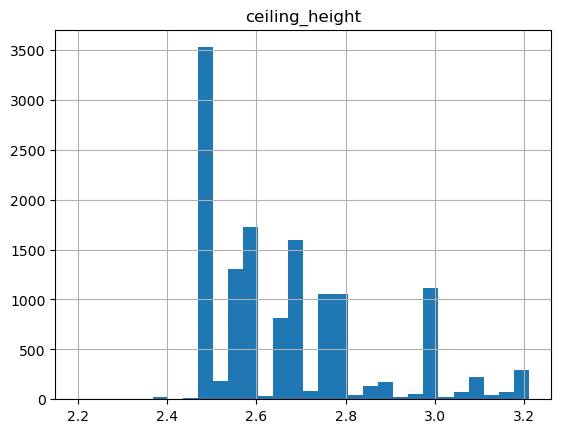

In [62]:
# Построим распределение по очищенным данным
delete_outliers(data, 'ceiling_height').hist('ceiling_height', bins=30)

In [63]:
delete_outliers(data, 'ceiling_height')['ceiling_height'].describe()

count    13664.000000
mean         2.679857
std          0.184020
min          2.200000
25%          2.500000
50%          2.640000
75%          2.760000
max          3.210000
Name: ceiling_height, dtype: float64

In [64]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

**Вывод**

В среднем **высота потолков** на рынке недвижимости составляет **2.68 м.**

### Шаг 3.2 Изучение времени продажи квартиры

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

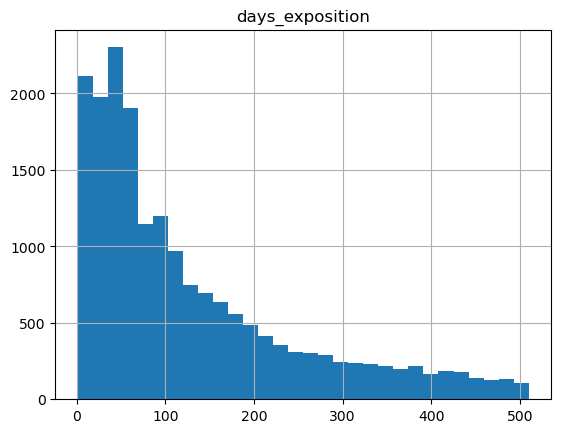

In [65]:
# Построим распределение по очищенным данным
delete_outliers(data, 'days_exposition').hist('days_exposition', bins=30)

In [66]:
# Очищенные данные
delete_outliers(data, 'days_exposition')['days_exposition'].describe()

count    18796.000000
mean       128.398117
std        121.153672
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        510.000000
Name: days_exposition, dtype: float64

In [67]:
# Неочищенные данные
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<Axes: >

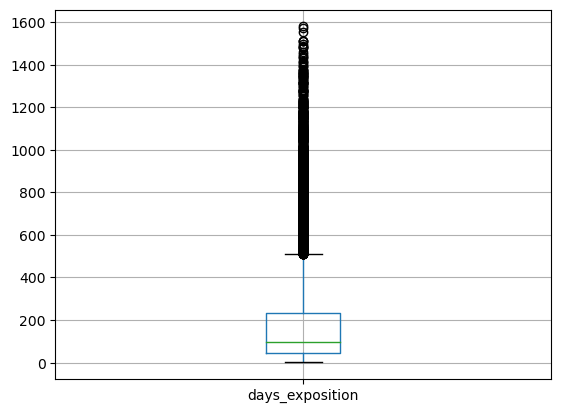

In [68]:
# Построим график распределения для неочищенных данных времени продажи квартир
data.boxplot(column='days_exposition')

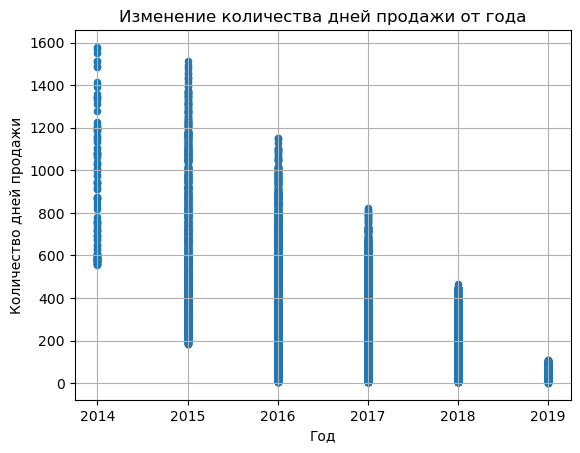

In [69]:
data.plot(kind='scatter', y='days_exposition', x='year', grid=True)
plt.xlabel('Год')
plt.ylabel('Количество дней продажи')
plt.title('Изменение количества дней продажи от года')
plt.show()

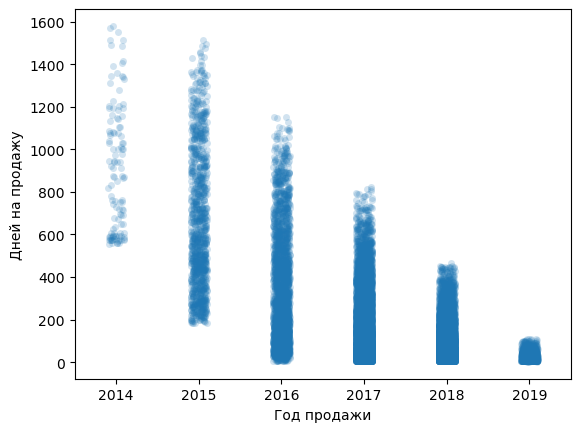

In [70]:
sns.stripplot(x='year',
             y='days_exposition',
             data=data,
             dodge=True,
             alpha=0.2)
plt.xlabel('Год продажи')
plt.ylabel('Дней на продажу')
plt.show()

In [71]:
number_of_days = data.groupby('year').agg({'days_exposition': ['count', 'median', 'mean']})
number_of_days.columns = ['count', 'median', 'mean']
number_of_days.reset_index()

,year,count,median,mean
0,2014,118,876.0,911.338983
1,2015,1103,581.0,652.130553
2,2016,2698,237.5,321.944774
3,2017,7914,103.0,159.028178
4,2018,7554,64.0,94.324199
5,2019,1083,23.0,30.931671


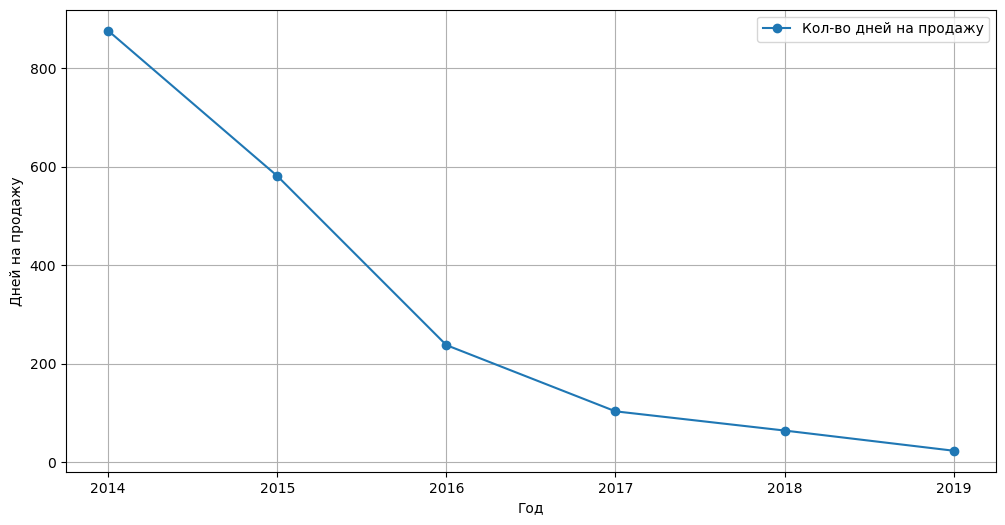

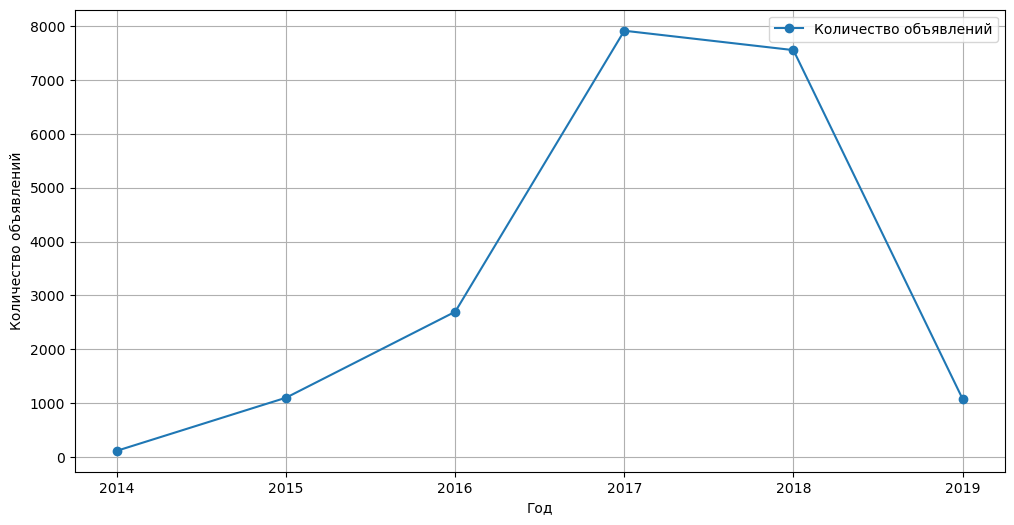

In [72]:
number_of_days.plot(y='median', style='o-', grid=True, figsize=(12, 6), label='Кол-во дней на продажу')
plt.xlabel('Год')
plt.ylabel('Дней на продажу')
plt.show()

number_of_days.plot(y='count', style='o-', grid=True, figsize=(12, 6), label='Количество объявлений')
plt.xlabel('Год')
plt.ylabel('Количество объявлений')
plt.show()

In [73]:
# Проверим, что отсутствующее значение в количестве дней продажи действительно говорит о незакрытом объявлении
data[data['days_exposition'].isnull()].groupby('year')['year'].count()

year
2014      18
2015      70
2016      67
2017     271
2018     958
2019    1796
Name: year, dtype: int64

In [74]:
data_2019 = data[data['year']==2019]
data_2019_not_close = data_2019[data_2019['days_exposition'].isnull()]
print(f'За 2019 год было опубликовано {len(data_2019)} объявлений, из которых {len(data_2019_not_close)} ещё не закрыты')

За 2019 год было опубликовано 2879 объявлений, из которых 1796 ещё не закрыты


### Выводы
В среднем квартиры продаются за **128 дней**. По медианному значению это число около **85 дней**. 25% квартир продается за 41 день и быстрее. Необычно долгие продажи превышают 510 дней.

При рассмотрении данных о количестве дней продажи квартиры было выявлено 3180 пропущенных значений. Если рассмотреть распределение этих значений по годам, то можно предположить, что большая часть этих объявлений ещё открыта и до сих пор продается, т.к. 56% от этого числа принадлежит последнему году, а 30% предпоследнему. Также возможно, что некторые объявления не были закрыты после продажи недвижимости.

### Шаг 3.3. Факторы влияющие на стоимость квартиры

In [75]:
# Автоматизируем первичный анализ данных
# ProfileReport(data)

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_15144\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

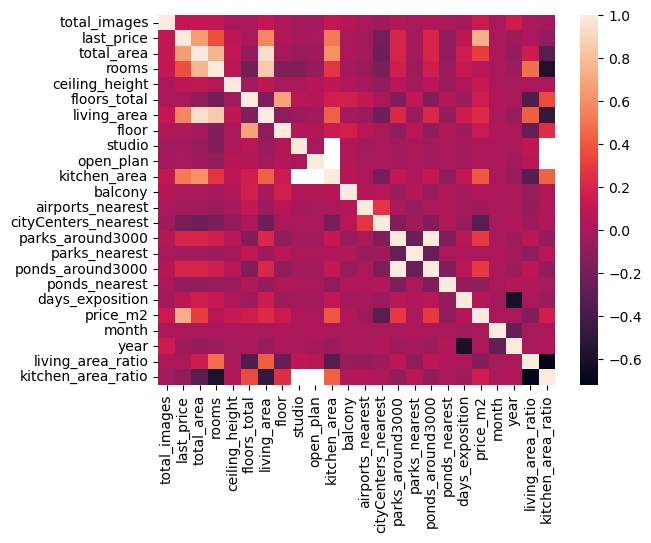

In [76]:
sns.heatmap(data.corr())

<Axes: title={'center': 'price_m2'}, xlabel='floor_category'>

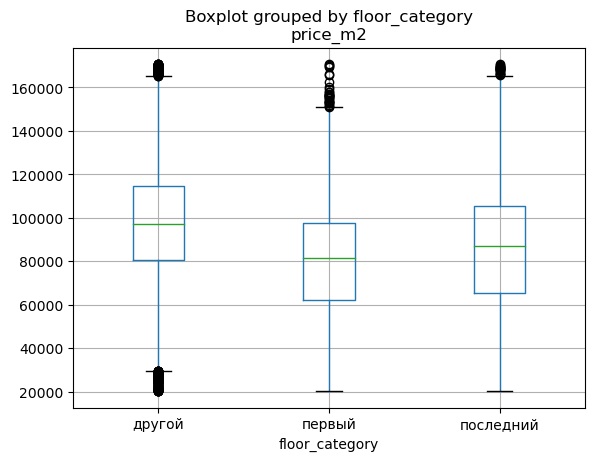

In [77]:
# Проверим зависит ли цена за кв.м. от этажа квартиры
delete_outliers(data, 'price_m2').boxplot('price_m2', by='floor_category')

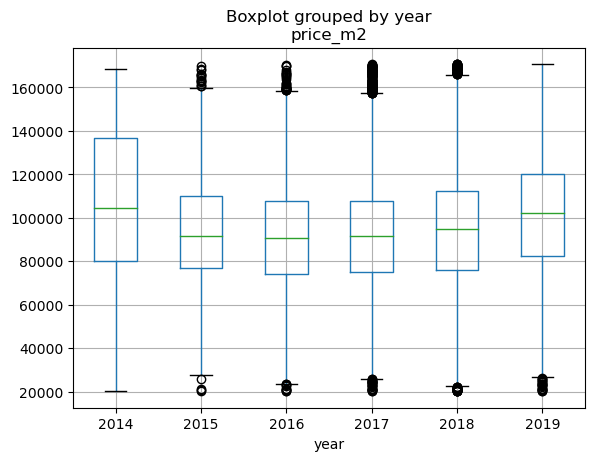

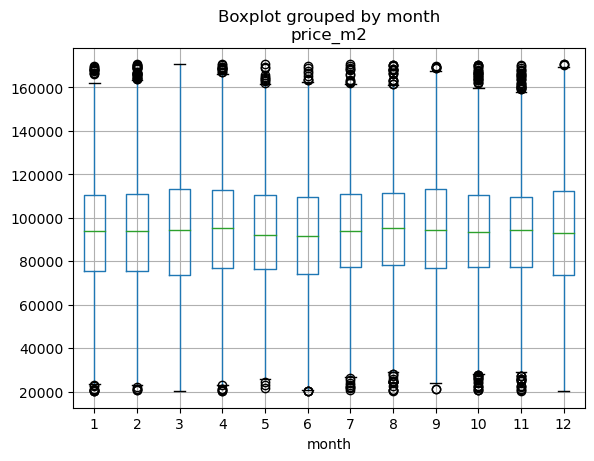

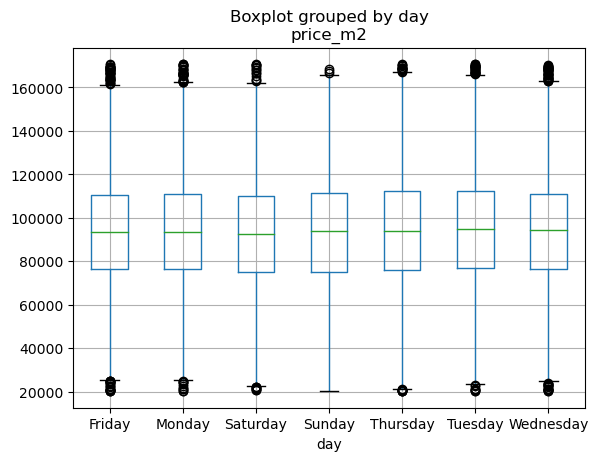

In [78]:
# Проверим зависимость от времени размещения
delete_outliers(data, 'price_m2').boxplot('price_m2', by='year')
delete_outliers(data, 'price_m2').boxplot('price_m2', by='month')
delete_outliers(data, 'price_m2').boxplot('price_m2', by='day')
plt.show()

**Выводы**

После изучения корреляции между различными факторами сделаем совершенно тривиальные выводы: на стоимость квартиры в перевую очередь влияет её площадь и количество комнат. Также наблюдается отрицательная корреляция для расстояния от центра города.

При рассмотрении медианных значений сделаем вывод: квартиры на первом этаже дешевле остальных. Последний этаж хоть и немного дороже квартир на первом, однако дешевле всех остальных.

Стоимость квартиры не зависит от дня недели и месяца публикации. В 2014 и 2019 наблюдается более высокая медианная стоимость квартир.

 ### Шаг 3.4. Сравнение стоимости по разным населенным пунктам (10 н.п. с наибольшим числом объявлений)

In [79]:
data['locality_name'].value_counts().head(10)

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

**Очень большое количество объявлений в Санкт-Петербурге**

In [80]:
def St_pet(row):
    if row['locality_name'] == 'санкт-петербург':
        return 'санкт-петербург'
    else:
        return 'Другие'

In [81]:
data['town_status'] = data.apply(St_pet, axis=1)

In [82]:
data.groupby('town_status').agg({'price_m2': ['mean', 'median']})

price_m2          
                          mean    median
town_status                             
Другие            68864.648632   68728.0
санкт-петербург  114848.565231  104761.0

In [83]:
top_10 = data.groupby('locality_name').agg({'town_status':'count', 'price_m2':'mean'})\
                             .reset_index()\
                             .sort_values('town_status', ascending=False).head(10)
top_10.rename(columns={'town_status': 'count_ad'}, inplace=True)
top_10

,locality_name,count_ad,price_m2
311,санкт-петербург,15721,114848.565231
233,поселок мурино,556,85681.305755
301,поселок шушары,440,78676.904545
3,всеволожск,398,68654.007538
305,пушкин,369,103125.373984
132,колпино,338,75424.150888
240,поселок парголово,327,90175.489297
6,гатчина,307,68745.693811
56,деревня кудрово,299,92473.086957
4,выборг,237,58141.489451


<Axes: ylabel='locality_name'>

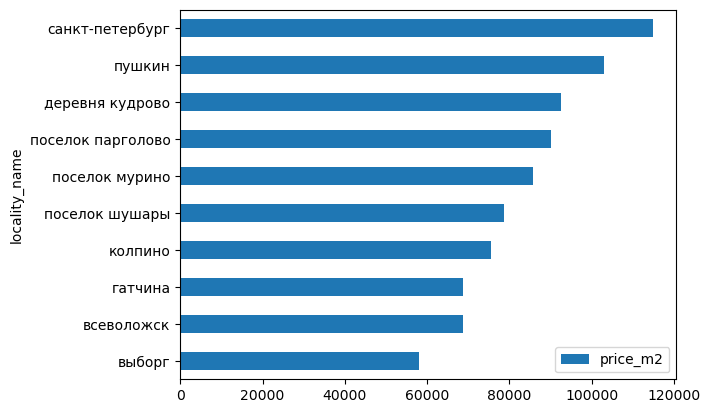

In [84]:
top_10.sort_values('price_m2').plot(y='price_m2', x='locality_name', kind='barh')

**Вывод**

Средние цены на квартиры в Санкт-Петербурге и других населенных пунктах значительно отличаются: примерно в 1.68 раз дороже квартиры в Санкт-Петербурге. 

В среднем в Санкт-Петербурге цена за кв.м. - 115 т.р. Самые дешевые квартиры из топ-10 по количеству объявлений - картиры в Выборге (средняя цена 58 т.р. за кв.м.) 

### Шаг 3.5. Выделение сегментов жилья в центре

* Рассмотрим крупный город с наибольшим населением - Санкт-Петербург. Центром примем его исторические районы
* По измерениям на карте определили, что центральные районы не выходят за радиус 3 км от центральной точки

In [85]:
center = data[(data['locality_name'] == 'санкт-петербург') & (data['cityCenters_nearest'] <= 3)]
len(center)

656

In [86]:
out_of_center = data[(data['locality_name'] == 'санкт-петербург') & (data['cityCenters_nearest'] > 3)]
len(out_of_center)

15004

Размер выборок значительно различается. Делать достоверные выводы при таком сравнении не получится

In [87]:
cor_out_center = out_of_center.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
cor_out_center.columns = ['parametrs', 'corr_out_of_center']

cor_center = center.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
cor_center.columns = ['parametrs', 'corr_center']

cor_out_center.merge(cor_center).style.background_gradient('coolwarm')

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_15144\2885406260.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_out_center = out_of_center.corr()\
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_15144\2885406260.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_center = center.corr()\


,parametrs,corr_out_of_center,corr_center
0,last_price,1.000000,1.000000
1,price_m2,0.730502,0.832367
2,total_area,0.671745,0.564391
3,living_area,0.580798,0.467534
4,kitchen_area,0.569421,0.364404
5,rooms,0.381500,0.229637
6,parks_around3000,0.125475,0.105495
7,ponds_around3000,0.125475,0.105495
8,days_exposition,0.091385,0.038648
9,total_images,0.090437,0.176876


**Вывод**

Значительных изменений в корреляции не наблюдается. Однако можно сделать вывод, что если в центре выше корреляция с ценой за квадратный метр, то на переферии более высокая корреляция с общей площадью, и количеством комнат.

<a name="stage_4"></a>
## Шаг 4. Формирование общего вывода

[Вернуться к оглавлению](#contents)

В процессе предобработки данных были изменены типы данных, заполнены пропущенные значения, удалены данные не представляющие ценности для исследования. Также выявлены неявны дублирующиеся значения, а расстояния до точек притяжения приведены к километрам.

Рассчитаны следующие параметры:
* цена квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

В процессе анализа данных была выполнена очистка от выбросов. Сделаны следующие выводы:
1. В среднем продаются квартиры площадью 54 кв.м. В целом 92% квартир обладают площадью менее 100 кв.м. 
2. В среднем стоимость продающихся квартир составляет 4.84 млн. руб. 95% квартир имеют стоимость до 15.3 млн. руб.
3. 68% рынка занимают равные части 1-комнатных и 2-комнатых квартир. Четверть рынка - это 3-комнатные квартиры. Только 5% рынка - это квартиры с 4-мя комнатами. Остальные 2% приходятся на варианты 5-19 комнат.
4. В среднем высота потолков на рынке недвижимости составляет 2.68 м.
5. В среднем квартиры продаются за 128 дней. По медианному значению это число около 85 дней. 25% квартир продается за 41 день и быстрее. Необычно долгие продажи превышают 510 дней.
6. На стоимость квартиры в перевую очередь влияет её площадь и количество комнат. Также наблюдается отрицательная корреляция для расстояния от центра города.
7. Квартиры на первом этаже дешевле остальных. Последний этаж хоть и немного дороже квартир на первом, однако дешевле всех остальных.
8. Стоимость квартиры не зависит от дня недели и месяца публикации. В 2014 и 2019 наблюдается более высокая медианная стоимость квартир.
9. Средние цены на квартиры в Санкт-Петербурге и других населенных пунктах значительно отличаются: примерно в 1.68 раз дороже квартиры в Санкт-Петербурге.
10. В среднем в Санкт-Петербурге цена за кв.м. - 115 т.р. Самые дешевые квартиры из топ-10 по количеству объявлений - картиры в Выборге (средняя цена 58 т.р. за кв.м.)
11. На переферии города цена на квартиру больше зависит от площади и количества комнат, тогда как в центре стоимость складывается из других факторов.


## Рекомендации площадке
- Уделить внимание отсутствующим значениям;
- Добавить проверку на корректность введенных значений (например в выборке потолки в 1.3 и 100 метров);
- Для избежания дублей и ошибок обеспечить ввод месторасположения квартиры в форму с единственным корректным вариантом.